<a href="https://colab.research.google.com/github/dmcclung/fastai_examples/blob/main/Pet_Breeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -Uqq fastai torch

In [4]:
from fastai.vision.all import *
import torch

In [5]:
path = untar_data(URLs.PETS)
path.ls()

(#2) [Path('/home/dylan/.fastai/data/oxford-iiit-pet/images'),Path('/home/dylan/.fastai/data/oxford-iiit-pet/annotations')]

In [6]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

/home/dylan/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dylan/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


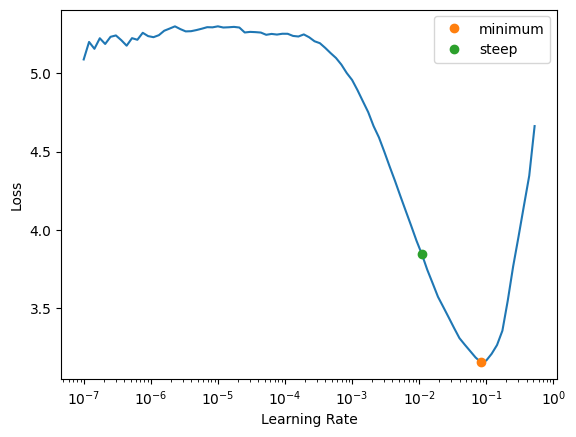

In [7]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [8]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 8.32e-03, steepest point: 1.10e-02


In [9]:
learn.fine_tune(2, base_lr=6.31e-03)

epoch,train_loss,valid_loss,error_rate,time
0,1.057131,0.425604,0.130582,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.705271,0.574379,0.182003,00:10
1,0.429469,0.265867,0.075101,00:09


In [10]:
learn.fine_tune??

In [11]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 4.37e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.101863,0.492226,0.142760,00:07
1,0.532291,0.342168,0.100812,00:07
2,0.328847,0.277696,0.077808,00:07


In [12]:
learn.unfreeze()

SuggestedLRs(valley=1.0964781722577754e-06)

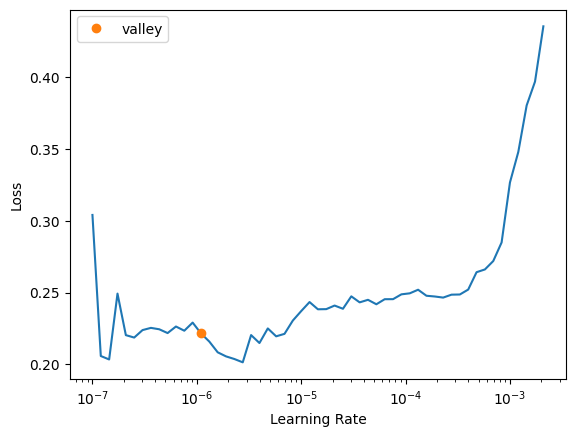

In [13]:
learn.lr_find()

In [14]:
learn.fit_one_cycle??

In [15]:
learn.fit_one_cycle(6, lr_max=2.51e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.265482,0.252442,0.073072,00:09
1,0.239690,0.247912,0.072395,00:09
2,0.199849,0.234034,0.070365,00:09
3,0.163030,0.230234,0.071719,00:09
4,0.139220,0.229510,0.067659,00:09
5,0.131260,0.224507,0.063599,00:09
